**PARKINSON'S DISEASE PREDICTION MODEL**

1] IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score


2] DATA COLLECTION AND ANALYSIS

In [ ]:
#reading the file after mounting the drive
parkinsons_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/parkinsons.csv')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#printing first 5 rows of data set
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
#printing the total number of rows and columns in dataset
parkinsons_data.shape

(195, 24)

In [ ]:
#getting more info about dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
#getting statistical information about data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
# checking for missing values
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
#distribution of target variable
parkinsons_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

1---> Parkinson's positive

 0---> Parkinson's negative

**DATA CLEANING AND PREPROCESSING**

In [ ]:
#grouping data based on outcome
parkinsons_data.groupby('status').mean()

<ipython-input-87-ef40e65f0016>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  parkinsons_data.groupby('status').mean()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [ ]:
#drop removes the specific columns, here we dont require the name and status for predicting whether a person has parkinsons or not
#In pandas axis = 0 refers to rows and axis = 1 refers to columns
x=parkinsons_data.drop(columns=['name', 'status'], axis=1)
y=parkinsons_data['status']

In [ ]:
print(x)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [ ]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


Using PCA for feature selection

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

# Assuming X is a 2D array with shape (195, 29)
pca = PCA(n_components=10) # keep 10 principal components
X_pca = pca.fit_transform(x)

# Get the explained variance ratio of each principal component
variance_ratio = pca.explained_variance_ratio_

# Get the loadings of the top 10 principal components
loadings = pca.components_[:10]

# Compute the absolute sum of the loadings across all top 10 components for each feature
loading_scores = pd.DataFrame(abs(loadings)).sum(axis=0)

# Sort the feature names by their loading scores and select the top 10 features
selected_features = loading_scores.sort_values(ascending=False)[:10].index.tolist()

# Print the names of the selected features
print("Selected Features:", selected_features)


Selected Features: [16, 19, 17, 0, 2, 9, 18, 20, 1, 15]


Data visualization

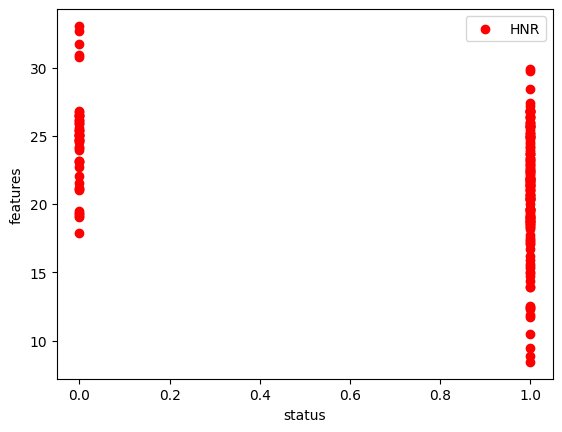

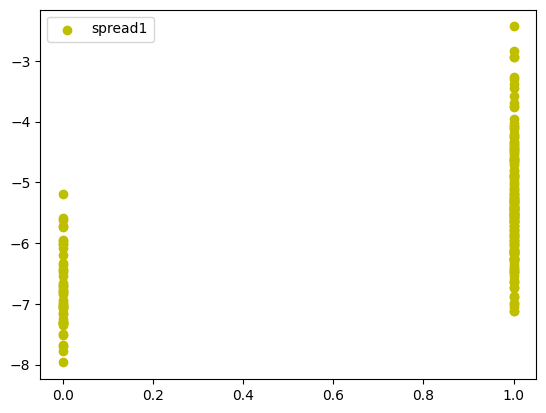

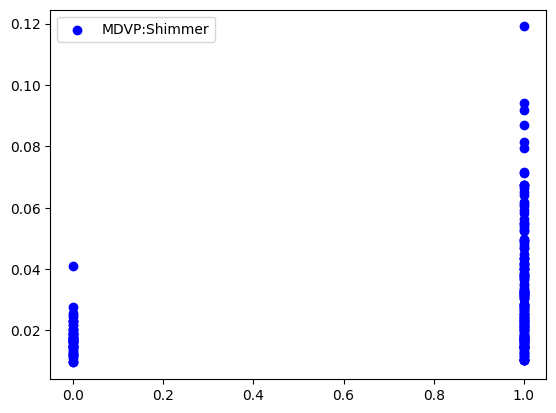

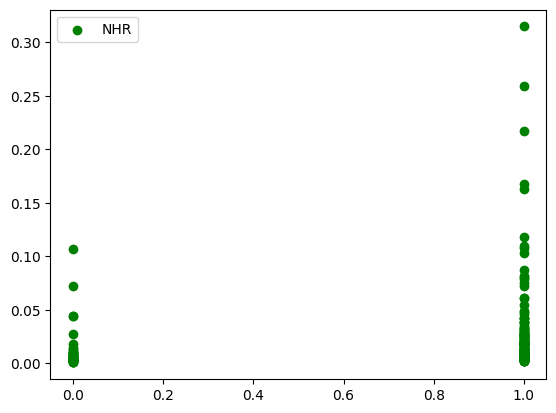

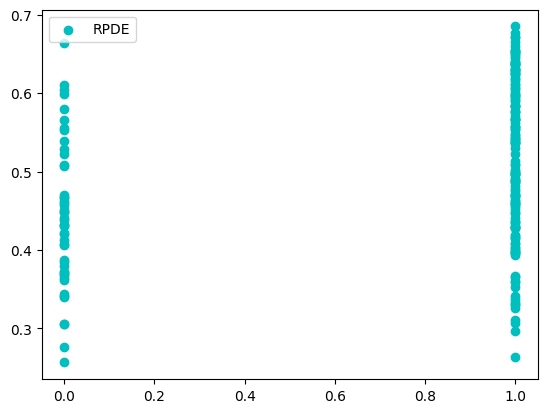

In [ ]:
import matplotlib.pyplot as plt
x1=parkinsons_data['status'][0:195]
y1=parkinsons_data['HNR'][0:195]#average vocal freq
y2=parkinsons_data['spread1'][0:195]
y3=parkinsons_data['MDVP:Shimmer'][0:195]
y4=parkinsons_data['NHR'][0:195]
y5=parkinsons_data['RPDE'][0:195]
plt.xlabel("status")
plt.ylabel("features")
#plt.title("Marks")
plt.scatter(x1,y1,label="HNR",color='r')
plt.legend()
plt.show()
plt.scatter(x1,y2,label="spread1",color='y')
plt.legend()
plt.show()
plt.scatter(x1,y3,label="MDVP:Shimmer",color='b')
plt.legend()
plt.show()
plt.scatter(x1,y4,label="NHR",color='g')
plt.legend()
plt.show()
plt.scatter(x1,y5,label="RPDE",color='c')
plt.legend()
plt.show()

SPLITTING INTO TRAINING AND TEST DATA

In [ ]:
#splitting the data using train_test_split function
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=2)
print(x.shape, xtrain.shape, xtest.shape)

(195, 22) (156, 22) (39, 22)


4] DATA STANDARDIZATION

In [ ]:
# Standardize features by removing the mean and scaling to unit variance.
scaler=StandardScaler()


In [ ]:
scaler.fit(xtrain)

StandardScaler()

In [ ]:
xtrain=scaler.transform(xtrain)
xtest=scaler.transform(xtest)
#xtrain and xtest are the functions to use for transforming the data


In [ ]:
print(xtrain)

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


5] MODEL TRAINING

MODEL 1: SUPPORT VECTOR MACHINE MODEL

In [ ]:

#This parameter specifies the type of kernel to be used in the algorithm, default is rbf
model=svm.SVC (kernel='linear')

In [ ]:
model.fit(xtrain, ytrain)

SVC(kernel='linear')

 MODEL EVALUATION for SVM model

In [ ]:
#accuracy score on test data
xtest_pred=model.predict(xtest)
testdata_accuracy=accuracy_score(ytest, xtest_pred)

In [ ]:
print("Accuracy score of test data: ",testdata_accuracy)

Accuracy score of test data:  0.8717948717948718


In [ ]:
from sklearn import svm
import numpy as np

# Assuming X_train, y_train, X_test are the training features, training targets, and test features respectively
clf = svm.SVC(kernel='linear', C=1, gamma='auto')  # Instantiate the SVM model

clf.fit(xtrain, ytrain)  # Train the SVM model using the training data

ypred1 = clf.predict(xtest)  # Use the trained SVM model to predict the target variable for the test data

print("Predicted targets:")
print(ypred1)


Predicted targets:
[1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 1 1]


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(ytest,ypred1)
print(confusion_matrix)

[[ 5  3]
 [ 2 29]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred1))

              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.91      0.94      0.92        31

    accuracy                           0.87        39
   macro avg       0.81      0.78      0.79        39
weighted avg       0.87      0.87      0.87        39



using other model naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(xtrain,ytrain)

GaussianNB()

6] MODEL EVALUATION for naive bayes model

In [ ]:
#accuracy score on test data
xtest_pred=classifier.predict(xtest)
testdata_accuracy=accuracy_score(ytest, xtest_pred)

In [ ]:
print("Accuracy score of test data: ",testdata_accuracy )

Accuracy score of test data:  0.6153846153846154


In [ ]:
ypred=classifier.predict(xtest)
print(ypred)

[1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0
 1 1]


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix1=confusion_matrix(ytest,ypred)
print(confusion_matrix1)

[[ 8  0]
 [15 16]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.35      1.00      0.52         8
           1       1.00      0.52      0.68        31

    accuracy                           0.62        39
   macro avg       0.67      0.76      0.60        39
weighted avg       0.87      0.62      0.65        39



After comparing both models we are selecting SVM model for our Prediction System

**BUILDING A PREDICTIVE SYSTEM**

In [ ]:
ip_data=(156.405,	189.398,	142.822,	0.00768,	0.00005,	0.00372,	0.00399,0.01116,0.03995,0.348,0.01721,0.02374,0.0431,0.05164,0.03365,17.153,0.649554,0.68608,-4.554466,0.340176,2.856676,0.322111)

#changing data into numpy format. given upper bar is a tuple, we have to convert it into array
ip_data_numpy=np.asarray(ip_data)

#reshape the obtained numpy array
ip_reshaped=ip_data_numpy.reshape(1,-1)
#these 1 and -1 parameters are imp as they tell the model that we are giving only 1 test set unlike 156 training datasets

#standardizing the data
st_data=scaler.transform(ip_reshaped)

pred=model.predict(st_data)
print(pred)

if(pred[0]==0):
  print("The person does not have Parkinson's disease")

else:
  print("The person has Parkinson's disease")

[1]
The person has Parkinson's disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
